In [1]:
#import modules for analyzing ,plotting, and formatting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns
import sqlite3
import os
import folium
import streamlit as st
import pydeck as pdk
import plotly.express as px

Are the number of fires increasing per year?
Amount of acers burned increasing?
average 

In [2]:
os.chdir(r"C:\Users\5luca\Documents\Python\Projects\wildfire_ca\data")
df = pd.read_csv('California_Fire_Incidents.csv')
weather = pd.read_csv('weather_ca.csv')

In [3]:
df.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      111 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [5]:
selected_columns = [
    'AcresBurned',
    'Started',
    'Extinguished',
    'Counties',
    'Latitude',
    'Longitude',
    'MajorIncident',
    'Name',
]

In [6]:
df2 = df[selected_columns].copy()
df2

,AcresBurned,Started,Extinguished,Counties,Latitude,Longitude,MajorIncident,Name
0,257314.0,2013-08-17T15:25:00Z,2013-09-06T18:30:00Z,Tuolumne,37.857000,-120.086000,False,Rim Fire
1,30274.0,2013-05-30T15:28:00Z,2013-06-08T18:30:00Z,Los Angeles,34.585595,-118.423176,False,Powerhouse Fire
2,27531.0,2013-07-15T13:43:00Z,2013-07-30T18:00:00Z,Riverside,33.709500,-116.728850,False,Mountain Fire
3,27440.0,2013-08-10T16:30:00Z,2013-08-30T08:00:00Z,Placer,39.120000,-120.650000,False,American Fire
4,24251.0,2013-05-02T07:01:00Z,2013-05-11T06:30:00Z,Ventura,0.000000,0.000000,True,Springs Fire
...,...,...,...,...,...,...,...,...
1631,9.0,2019-10-10T12:08:00Z,2019-10-10T18:11:00Z,Riverside,33.827979,-117.499619,False,Eagle Fire
1632,2.0,2019-06-28T15:03:04Z,2019-06-28T17:33:00Z,Nevada,39.409722,-121.000556,False,Long Fire
1633,NaN,2019-11-25T12:02:02Z,NaN,Yolo,38.734634,-121.729691,False,Cashe Fire
1634,NaN,2019-10-22T19:20:44Z,NaN,San Diego,33.351145,-117.403719,False,Oak Fire


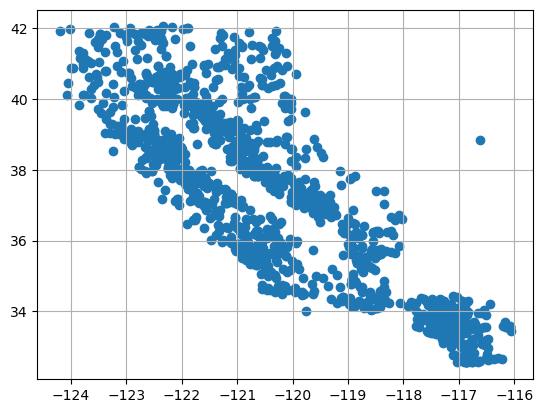

In [7]:
df_select = df2[df2.Longitude<-115]
df_select = df_select[(df_select.Latitude<44) & (df_select.Latitude > 30)]
plt.scatter(df_select.Longitude, df_select.Latitude)
plt.grid()
plt.show()

In [8]:
#Majordf = df_select.iloc[i]['Longitude'== 'True']]
#map
zoom_factor = 5 
radius_scaling = 25

ca_map = folium.Map (location = [36,-120], zoom_start = zoom_factor)

for i in range (0,df_select.shape[0]):
    folium.Circle(
      location=[df_select.iloc[i]['Latitude'], df_select.iloc[i]['Longitude']],
      radius=np.sqrt(df_select.iloc[i]['AcresBurned'])*radius_scaling,
      color='red',
      fill=True,
      fill_color='red'
   ).add_to(ca_map)
ca_map

In [9]:
df2.head()

,AcresBurned,Started,Extinguished,Counties,Latitude,Longitude,MajorIncident,Name
0,257314.0,2013-08-17T15:25:00Z,2013-09-06T18:30:00Z,Tuolumne,37.857000,-120.086000,False,Rim Fire
1,30274.0,2013-05-30T15:28:00Z,2013-06-08T18:30:00Z,Los Angeles,34.585595,-118.423176,False,Powerhouse Fire
2,27531.0,2013-07-15T13:43:00Z,2013-07-30T18:00:00Z,Riverside,33.709500,-116.728850,False,Mountain Fire
3,27440.0,2013-08-10T16:30:00Z,2013-08-30T08:00:00Z,Placer,39.120000,-120.650000,False,American Fire
4,24251.0,2013-05-02T07:01:00Z,2013-05-11T06:30:00Z,Ventura,0.000000,0.000000,True,Springs Fire


In [10]:
selected_columns = [
    'Longitude',
    'Latitude']
df3 = df[selected_columns].copy()
df3.dtypes

Longitude    float64
Latitude     float64
dtype: object

In [95]:
max(df2['AcresBurned'])

410203.0

In [105]:

#raduis_scaling = df2.iloc[i]['AcresBurned']/2


view =pdk.ViewState(
        latitude=37,
        longitude=-120,
        zoom=5,
        pitch=40)


column_layer = pdk.Layer(
    "ColumnLayer",
    data=df2,
    get_position=["Longitude", "Latitude"],
    get_elevation=raduis_scaling,
    elevation_scale=100,
    radius=np.sqrt(df2.iloc[i]['AcresBurned'])*175,
    get_fill_color=[255, 'AcresBurned > 0 ? 5000 * AcresBurned : -200 * AcresBurned', 'AcresBurned', 140],
    pickable=True,
    extruted = True,
    coverage = 1.5,
    auto_highlight=True,
)


r = pdk.Deck(
    column_layer,
    initial_view_state=view,
    tooltip=tooltip,
    #map_provider="mapbox",
    map_style=pdk.map_styles.LIGHT,
)

r.to_html("column_layer.html")